In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 100,
    "text.usetex": False, 
    "axes.grid": True
})

# Introduction
In probability and statistics, we often want to understand the behavior of averages, especially when dealing with uncertain or random processes – like rolling dice, flipping coins, or spinning a roulette wheel.

The **Central Limit Theorem (CLT)** is one of the most important ideas in statistics. It explains why the **average of many random events tends to follow a bell-shaped (normal) curve**, even if the original data is not normally distributed at all.

This has powerful real-world applications: from predicting population behavior to estimating financial risk.

In this tutorial, we will explore the CLT using simulated roulette spins.

# What is the Central Limit Theorem (CLT)?

The Central Limit Theorem says:
>If you take a large number of **random samples** from **any probability distribution** with a **finite mean and variance**, and calculate the **average (mean)** of each sample, then **the distribution of those sample means** will tend to be **normal (bell-shaped) – regardless of the shape of the original distribution**.

Let's break that down:
- **Sample:** A subset of data points taken from a larger group.
In our case: a few roulette spins.
- **Mean (Average):** The sum of numbers divided by how many there are.
For example, the average of [3, 7, 5] is (3+7+5)/3 = 5.
- **Probability Distribution:** Describes how likely each outcome is.
Roulette numbers from 0 to 36 have a uniform distribution — all numbers are equally likely.
- **Finite Variance:** The data is not extremely spread out.
In roulette, numbers range from 0 to 36, so variance is finite.
- **Normal Distribution:** A symmetric, bell-shaped curve often seen in nature, math, and statistics.

# Why use Roulette?
Roulette is one of the most iconic and widely recognized casino games in the world. The word “roulette” comes from the French for “little wheel,” and the game is believed to have originated in 17th-century France, blending elements of older wheel games with innovations by mathematician and inventor Blaise Pascal. Over time, roulette spread across Europe and later to the United States, where it evolved into multiple variants.

There are two main versions:
- European roulette: contains 37 pockets (numbers 0–36)
- American roulette: contains 38 pockets (numbers 0–36 plus a 00)
- 
![](https://upload.wikimedia.org/wikipedia/commons/5/5d/American_roulette_wheel_layout.png)

[The arrangement of the numbers in the American roulette wheel](https://de.wikipedia.org/wiki/Roulette)

The core rules are simple:
- A small ball is spun on a rotating wheel with numbered pockets.
- Players place bets on where the ball will land—specific numbers, ranges (e.g., 1–12), colors (red or black), odd/even, etc.
- Each spin is independent, and every number has a fixed probability (1/37 in European roulette).

Roulette is a great example of a random process: it’s governed by chance, the outcomes are unpredictable, and the result of one spin doesn’t influence the next. That makes it a useful candidate for illustrating statistical concepts—especially the Central Limit Theorem (CLT).

Why is that?

In roulette:
- The outcome of each spin is a discrete number from 0 to 36.
- Each number has equal probability (uniform distribution).
- Spins are independent of each other.
- The individual outcomes are not normally distributed.

In other words: roulette outcomes are the opposite of what you'd expect from a bell curve. But—and this is the magic of the CLT—if we take multiple samples of roulette spins and compute their averages, those averages will begin to form a normal distribution. This transformation from flat randomness to a bell curve is exactly what the CLT describes.

By using roulette in a simulation, we can vividly demonstrate how even a game of pure chance can give rise to structure and predictability when we look at averages across many samples.

Let’s now see how this works in code.

# Python Example: CLT with Roulette

Let’s simulate a roulette wheel (numbers 0–36), take many samples, and compute their means.

- We simulate 1000 samples, each consisting of 5, 30, 100 and 500 roulette spins.
- For each sample, we calculate the mean of the numbers.
- Then we plot a histogram of these means to visualize their distribution.

In [3]:
with open('/kaggle/input/1miospin/one_million_spins.txt', 'r') as file:
    spins = [int(line.strip()) for line in file if line.strip().isdigit()]

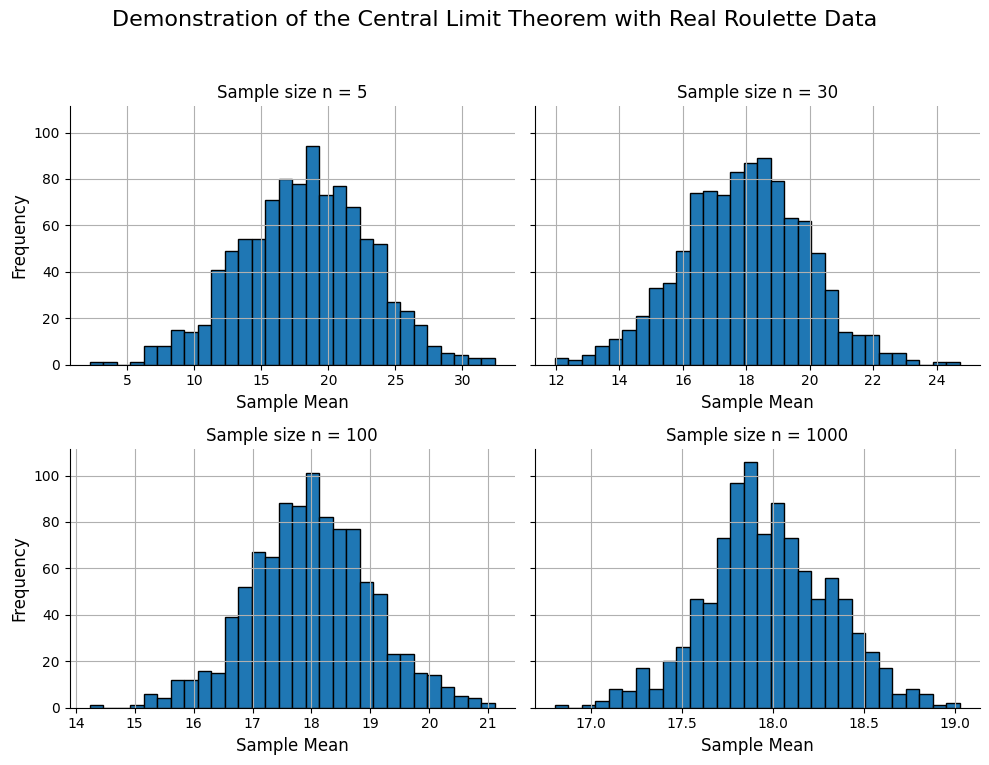

In [4]:
sample_sizes = [5, 30, 100, 1000]
num_samples = 1000

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle("Demonstration of the Central Limit Theorem with Real Roulette Data", fontsize=16)

for idx, sample_size in enumerate(sample_sizes):
    means = [
        np.mean(np.random.choice(spins, size=sample_size, replace=False))
        for _ in range(num_samples)
    ]

    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.hist(means, bins=30, edgecolor='black')
    ax.set_title(f"Sample size n = {sample_size}", fontsize=12)
    ax.set_xlabel("Sample Mean")
    if col == 0:
        ax.set_ylabel("Frequency")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The four subplots illustrate how the distribution of sample means evolves as the sample size increases.

# What to expect in the result
For the last subplot, where the sample size is the biggest, you’ll see a almost bell-shaped histogram – even though the individual roulette numbers are uniformly distributed. This is proof of the CLT in action.

The center of the bell will be around 18, because the expected value of a uniform distribution from 0 to 36 is:

>(0 + 36) / 2 = 18

The spread (standard deviation) of the means will be narrower than that of individual roulette numbers. Why? Because averaging reduces variability.



# Important Notes / Things to Watch Out For
- **Independence is required:** Each roulette spin must be independent of the others.-
- **Sample size matters:**
    - Larger sample sizes (e.g., 30+) give a better approximation of the normal distribution.
    - If you only average 2–3 numbers, the distribution will be jagged.
- **Number of samples matters:**
    - 1000+ samples gives a smoother histogram.
- **Original distribution doesn’t need to be normal:**
    - That’s the beauty of CLT. Even though roulette numbers are not normal, the means become normal with enough data.

# Conclusion
The Central Limit Theorem is a powerful and surprising idea: it says that averages of random data behave predictably, even if the original data is chaotic or strange.

Roulette is a perfect example: random, uniform, and unpredictable at first — but when we zoom out and look at averages across many spins, a beautiful, smooth bell curve appears.